In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('Electric_Vehicle_Population_Data.csv')

In [8]:
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,KM8K33AGXL,King,Seattle,WA,98103.0,2020,HYUNDAI,KONA,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,258,0,43.0,249675142,POINT (-122.34301 47.659185),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
1,1C4RJYB61N,King,Bothell,WA,98011.0,2022,JEEP,GRAND CHEROKEE,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,0,1.0,233928502,POINT (-122.20578 47.762405),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
2,1C4RJYD61P,Yakima,Yakima,WA,98908.0,2023,JEEP,GRAND CHEROKEE,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,0,14.0,229675939,POINT (-120.6027202 46.5965625),PACIFICORP,5.307700e+10
3,5YJ3E1EA7J,King,Kirkland,WA,98034.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,45.0,104714466,POINT (-122.209285 47.71124),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
4,WBY7Z8C5XJ,Thurston,Olympia,WA,98501.0,2018,BMW,I3,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,97,0,22.0,185498386,POINT (-122.89692 47.043535),PUGET SOUND ENERGY INC,5.306701e+10


In [12]:
df.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

In [16]:
df.describe()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,150479.000000,150482.000000,150482.000000,150482.000000,150141.000000,1.504820e+05,1.504790e+05
mean,98168.344154,2020.005436,67.877839,1312.644735,29.343950,2.111122e+08,5.297195e+10
std,2473.612184,3.015209,96.230009,9231.310215,14.824829,8.196388e+07,1.638841e+09
min,1730.000000,1997.000000,0.000000,0.000000,1.000000,4.385000e+03,1.081042e+09
25%,98052.000000,2018.000000,0.000000,0.000000,18.000000,1.693473e+08,5.303301e+10
50%,98122.000000,2021.000000,18.000000,0.000000,33.000000,2.150306e+08,5.303303e+10
75%,98370.000000,2023.000000,97.000000,0.000000,43.000000,2.399119e+08,5.305307e+10
max,99577.000000,2024.000000,337.000000,845000.000000,49.000000,4.792548e+08,5.603300e+10


In [18]:
df.isnull().sum()

VIN (1-10)                                             0
County                                                 3
City                                                   3
State                                                  0
Postal Code                                            3
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 341
DOL Vehicle ID                                         0
Vehicle Location                                       7
Electric Utility                                       3
2020 Census Tract                                      3
dtype: int64

In [32]:
# Data Cleaning
cleaned_data = df.dropna(subset=['County', 'City', 'Electric Vehicle Type', 'Electric Range', 'Base MSRP'])

C:\Users\pp912\AppData\Local\Temp\ipykernel_8916\1871022240.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=cleaned_data, y='Electric Vehicle Type',


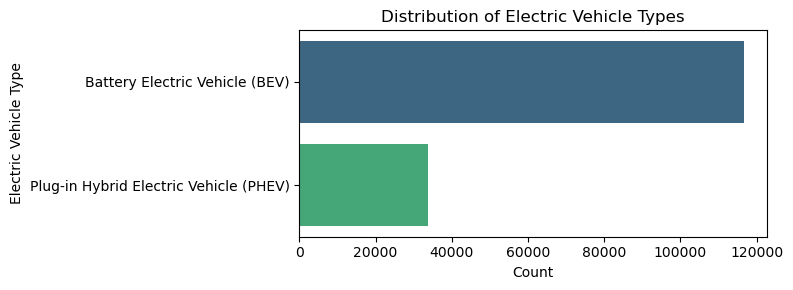

In [38]:
# 1. Distribution of Electric Vehicle Types
plt.figure(figsize=(8,3))
sns.countplot(data=cleaned_data, y='Electric Vehicle Type', 
              order=cleaned_data['Electric Vehicle Type'].value_counts().index, palette='viridis')
plt.title('Distribution of Electric Vehicle Types')
plt.xlabel('Count')
plt.ylabel('Electric Vehicle Type')
plt.tight_layout()
plt.show()

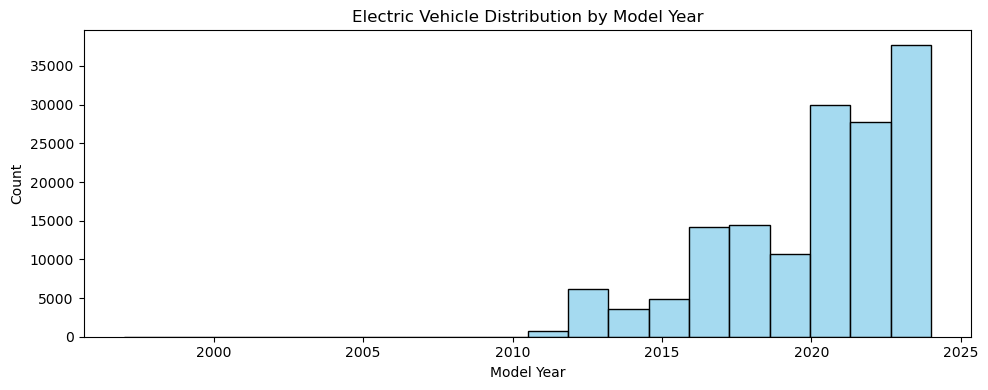

In [42]:
# 2. Electric Vehicle Distribution by Year
plt.figure(figsize=(10, 4))
sns.histplot(data=cleaned_data, x='Model Year', kde=False, bins=20, color='skyblue')
plt.title('Electric Vehicle Distribution by Model Year')
plt.xlabel('Model Year')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

C:\Users\pp912\AppData\Local\Temp\ipykernel_8916\2535488925.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_makes.values, y=top_makes.index, palette='coolwarm')


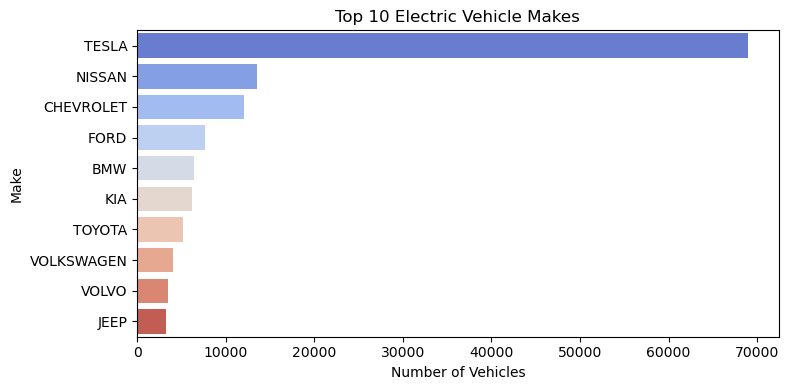

In [44]:
# 3. Top 10 EV Makes
top_makes = cleaned_data['Make'].value_counts().nlargest(10)
plt.figure(figsize=(8, 4))
sns.barplot(x=top_makes.values, y=top_makes.index, palette='coolwarm')
plt.title('Top 10 Electric Vehicle Makes')
plt.xlabel('Number of Vehicles')
plt.ylabel('Make')
plt.tight_layout()
plt.show()

C:\Users\pp912\AppData\Local\Temp\ipykernel_8916\2548726224.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=cleaned_data, x='Electric Range', palette='magma')


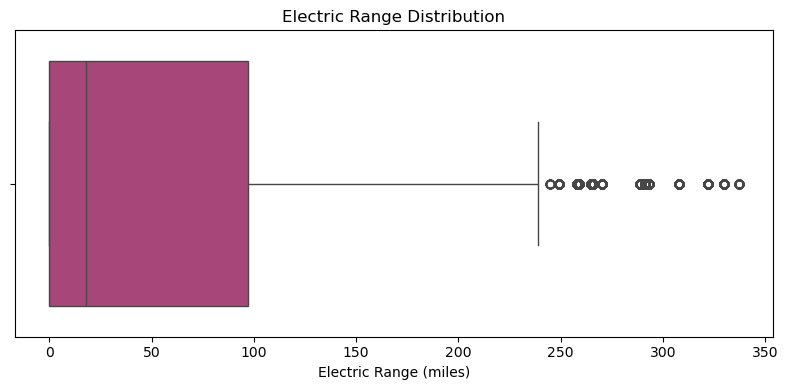

In [46]:
# 4. Electric Range Distribution
plt.figure(figsize=(8, 4))
sns.boxplot(data=cleaned_data, x='Electric Range', palette='magma')
plt.title('Electric Range Distribution')
plt.xlabel('Electric Range (miles)')
plt.tight_layout()
plt.show()

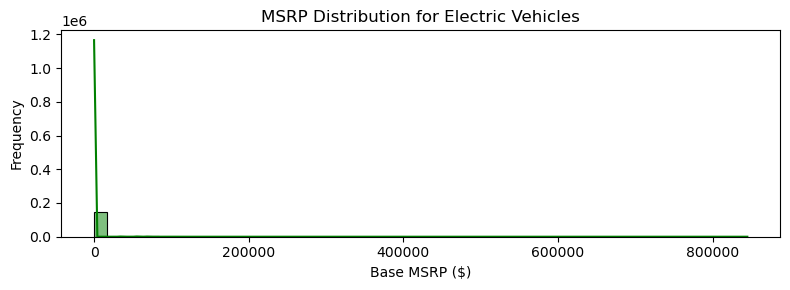

In [50]:
# 5. MSRP Distribution
plt.figure(figsize=(8, 3))
sns.histplot(data=cleaned_data, x='Base MSRP', bins=50, kde=True, color='green')
plt.title('MSRP Distribution for Electric Vehicles')
plt.xlabel('Base MSRP ($)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

C:\Users\pp912\AppData\Local\Temp\ipykernel_8916\3691945719.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_counties.values, y=top_counties.index, palette='cubehelix')


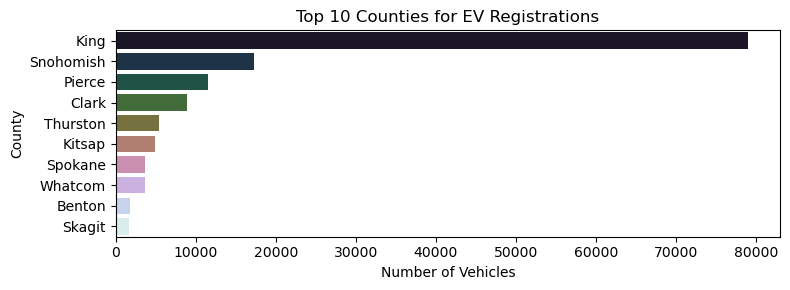

In [52]:
# 6. Regional Adoption by County
top_counties = cleaned_data['County'].value_counts().nlargest(10)
plt.figure(figsize=(8, 3))
sns.barplot(x=top_counties.values, y=top_counties.index, palette='cubehelix')
plt.title('Top 10 Counties for EV Registrations')
plt.xlabel('Number of Vehicles')
plt.ylabel('County')
plt.tight_layout()
plt.show()

                                            Conclusion
1. Market Leadership: Tesla remains the dominant player in the EV market.
2. Rapid Growth: EV registrations have surged, particularly after 2015.
3. Urban Adoption: Urban counties, like King County, lead in EV registrations, highlighting city-based sustainability efforts.
4. Accessibility: Increasing affordability and improved electric range are key drivers for adoption.
5. Future Outlook: Electric vehicles are shaping a sustainable and innovative transportation future.